Loading the Data
Dataset here will be the Babi Data Set from Facebook Research.

In [1]:
import pickle
import numpy as np

with open('train_qa.txt','rb') as f:
    train_data=pickle.load(f)
    
with open('test_qa.txt','rb') as f:
    test_data=pickle.load(f)

Exploring the Format of the Data

In [2]:
print("length of test data",len(test_data))
print("length of train data",len(train_data))
print("type of data",type(test_data))

length of test data 1000
length of train data 10000
type of data <class 'list'>


In [3]:
#Exploring how the data looks
train_data[0]
# train_data[0][0] is story and train_data[0][1] is question and train_data[0][2] is answer  

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [7]:
print("story->",' '.join(train_data[0][0]),"question->",' '.join(train_data[0][1]),"answer :",' '.join(train_data[0][2]))

story-> Mary moved to the bathroom . Sandra journeyed to the bedroom . question-> Is Sandra in the hallway ? answer : n o


Setting up Vocabulary of All Words

In [9]:
#combining the data
all_data=test_data+ train_data
print(len(all_data))

11000


In [10]:
#adding vocabulary in the set
vocab =set()
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [11]:
vocab.add('no')
vocab.add('yes')

In [12]:
# preview of vocab
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [13]:
vocab_len=len(vocab)+1#we add an extra space to hold a 0 for Keras's pad_sequences

In [14]:
vocab_len

38

In [15]:
#Longest story

all_story_lens=[len(data[0]) for data in all_data]
maximum_story_len=max(all_story_lens)

In [16]:
#Longest question
all_question_lens=[len(data[1]) for data in all_data]
maximum_question_len=max(all_question_lens)

Vectorizing the data

In [18]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [19]:
# integer encode sequences of words
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [20]:
tokenizer.word_index

{'apple': 1,
 'daniel': 2,
 'journeyed': 3,
 'grabbed': 4,
 'moved': 5,
 'got': 6,
 'milk': 7,
 'to': 8,
 'no': 9,
 'kitchen': 10,
 'is': 11,
 'the': 12,
 'bathroom': 13,
 'office': 14,
 'back': 15,
 'yes': 16,
 'there': 17,
 'football': 18,
 'up': 19,
 'sandra': 20,
 'left': 21,
 'dropped': 22,
 'hallway': 23,
 'john': 24,
 '?': 25,
 'bedroom': 26,
 'in': 27,
 'went': 28,
 'took': 29,
 'put': 30,
 'discarded': 31,
 'garden': 32,
 'picked': 33,
 'travelled': 34,
 'down': 35,
 '.': 36,
 'mary': 37}

In [21]:
train_story_text=[]
train_question_text=[]
train_answers=[]

In [22]:
# Splitting into 3 seperate lists
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [23]:
train_story_seq =tokenizer.texts_to_sequences(train_story_text)

Functionalize Vectorization

In [24]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=maximum_story_len,max_question_len=maximum_question_len):
    #Stories=X
    X=[]
    #Questions=Xq
    Xq=[]
    #Y Correct answer(yes/no)
    Y=[]
    
    for story,query,answer in data:
        x=[word_index[word.lower()] for word  in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=maximum_story_len),pad_sequences(Xq,maxlen=maximum_question_len),np.array(Y))
'''

    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
'''

'\n\n    OUTPUT:\n    \n    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and\n    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate\n    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.\n    \n    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)\n'

In [25]:
inputs_train , queries_train , answers_train =vectorize_stories(train_data)

In [26]:
inputs_test , queries_test , answers_test =vectorize_stories(test_data)

In [27]:
#example of vectorized data
inputs_test

array([[ 0,  0,  0, ..., 12, 26, 36],
       [ 0,  0,  0, ..., 12, 32, 36],
       [ 0,  0,  0, ..., 12, 32, 36],
       ...,
       [ 0,  0,  0, ..., 12,  1, 36],
       [ 0,  0,  0, ..., 12, 32, 36],
       [ 0,  0,  0, ...,  1, 17, 36]])

Creating Model

In [28]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [30]:
# we have two inputs stories and questions
input_sequence=Input((maximum_story_len,))
question=Input((maximum_question_len,))
#Input() is used to instantiate a Keras tensor.

In [31]:
vocab_size=len(vocab)+1

To build this network we have choosen the below article

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

Encoders

In [32]:
#INPUT ENCODER M
# Input gets embedded to a sequence of vectors
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [33]:
#INPUT ENCODER C
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=maximum_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [35]:
#question ENCODER C
# embed the question into a sequence of vectors
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=maximum_question_len))
question_encoder.add(Dropout(0.3))

In [36]:
#Encoded<---encoder(input)
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m =input_encoder_m(input_sequence)
input_encoded_c =input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

Use dot product to compute the match between first input vector seq and the query

In [38]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [39]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [40]:
# concatenate the match matrix with the question vector sequence
answer=concatenate([response,question_encoded])

In [41]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [42]:
# Reduce with RNN (LSTM)
answer=LSTM(32)(answer)

In [43]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [44]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
______________________________________________________________________________________________

In [46]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 6s 11ms/step - loss: 0.9066 - accuracy: 0.4871 - val_loss: 0.6979 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 3s 10ms/step - loss: 0.7041 - accuracy: 0.4938 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6970 - accuracy: 0.4880 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6938 - accuracy: 0.5101 - val_loss: 0.6987 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6953 - accuracy: 0.4969 - val_loss: 0.6941 - val_accuracy: 0.5030
Epoch 6/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6943 - accuracy: 0.5025 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 5s 14ms/step - loss: 0.6949 - accuracy: 0.4907 - val_loss: 0.6936 - val_accuracy:

313/313 [==============================] - 5s 17ms/step - loss: 0.3752 - accuracy: 0.8306 - val_loss: 0.4449 - val_accuracy: 0.7980
Epoch 58/120
313/313 [==============================] - 4s 14ms/step - loss: 0.3729 - accuracy: 0.8295 - val_loss: 0.4733 - val_accuracy: 0.7890
Epoch 59/120
313/313 [==============================] - 5s 16ms/step - loss: 0.3750 - accuracy: 0.8298 - val_loss: 0.4645 - val_accuracy: 0.7970
Epoch 60/120
313/313 [==============================] - 6s 18ms/step - loss: 0.3749 - accuracy: 0.8314 - val_loss: 0.4575 - val_accuracy: 0.7990
Epoch 61/120
313/313 [==============================] - 5s 16ms/step - loss: 0.3741 - accuracy: 0.8296 - val_loss: 0.4602 - val_accuracy: 0.7960
Epoch 62/120
313/313 [==============================] - 5s 15ms/step - loss: 0.3666 - accuracy: 0.8368 - val_loss: 0.4676 - val_accuracy: 0.7960
Epoch 63/120
313/313 [==============================] - 5s 16ms/step - loss: 0.3699 - accuracy: 0.8310 - val_loss: 0.4580 - val_accuracy: 0.799

Epoch 113/120
313/313 [==============================] - 4s 14ms/step - loss: 0.2975 - accuracy: 0.8689 - val_loss: 0.5493 - val_accuracy: 0.7920
Epoch 114/120
313/313 [==============================] - 5s 15ms/step - loss: 0.2986 - accuracy: 0.8708 - val_loss: 0.5686 - val_accuracy: 0.7960
Epoch 115/120
313/313 [==============================] - 5s 17ms/step - loss: 0.2998 - accuracy: 0.8660 - val_loss: 0.5773 - val_accuracy: 0.7990
Epoch 116/120
313/313 [==============================] - 4s 13ms/step - loss: 0.2947 - accuracy: 0.8724 - val_loss: 0.5572 - val_accuracy: 0.7950
Epoch 117/120
313/313 [==============================] - 4s 14ms/step - loss: 0.2943 - accuracy: 0.8692 - val_loss: 0.5499 - val_accuracy: 0.7980
Epoch 118/120
313/313 [==============================] - 5s 16ms/step - loss: 0.2914 - accuracy: 0.8754 - val_loss: 0.5377 - val_accuracy: 0.7950
Epoch 119/120
313/313 [==============================] - 5s 16ms/step - loss: 0.2922 - accuracy: 0.8714 - val_loss: 0.5329 -

Saving the model

In [47]:
filename = 'chatbot_epochs.h5'
model.save(filename)

C:\Users\kmegh\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Plotting Out Training History

In [48]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


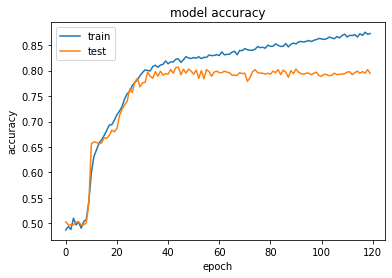

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating on Given Test Set

In [50]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [51]:
story =' '.join(word for word in test_data[0][0])
print(story)
query = ' '.join(word for word in test_data[0][1])
print(query)

Mary got the milk there . John moved to the bedroom .
Is John in the kitchen ?


In [52]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [53]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9923131
